# Creating a neural network ```tensorflow``` and ```keras```

## Import libraries

In [4]:
# generic tools
import numpy as np
import datetime 

# tools from sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
%load_ext tensorboard
# delete logs from previous runs - not always safe!
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Download data, normalize, train-test split, binarize labels

In [3]:
X, y = fetch_openml('mnist_784', return_X_y=True)

In [5]:
# normalize
X_norm = X/255

In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=42, test_size = 0.2)

In [7]:
# label binarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

In [9]:
# define architecture 784x256x128x10
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax")) #softmax generalises LogReg for multiclass tasks
          

## Show summary of model architecture

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

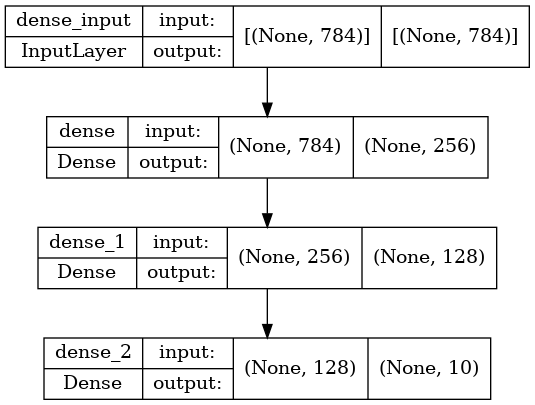

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

In [14]:
# define the gradient descent
sgd = SGD(0.01)
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

## Train model and save history

In [15]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10,
                    batch_size = 32)

Epoch 1/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.6045 - accuracy: 0.8435 - val_loss: 0.3244 - val_accuracy: 0.9079
Epoch 2/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2882 - accuracy: 0.9168 - val_loss: 0.2631 - val_accuracy: 0.9268
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2374 - accuracy: 0.9316 - val_loss: 0.2282 - val_accuracy: 0.9384
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2024 - accuracy: 0.9414 - val_loss: 0.2006 - val_accuracy: 0.9454
Epoch 5/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1763 - accuracy: 0.9486 - val_loss: 0.1792 - val_accuracy: 0.9504
Epoch 6/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1553 - accuracy: 0.9551 - val_loss: 0.1648 - val_accuracy: 0.9539
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9605 - val_loss: 0.1529 - val_accuracy:

## Visualise using ```matplotlib```

Different stylesheets can be found here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

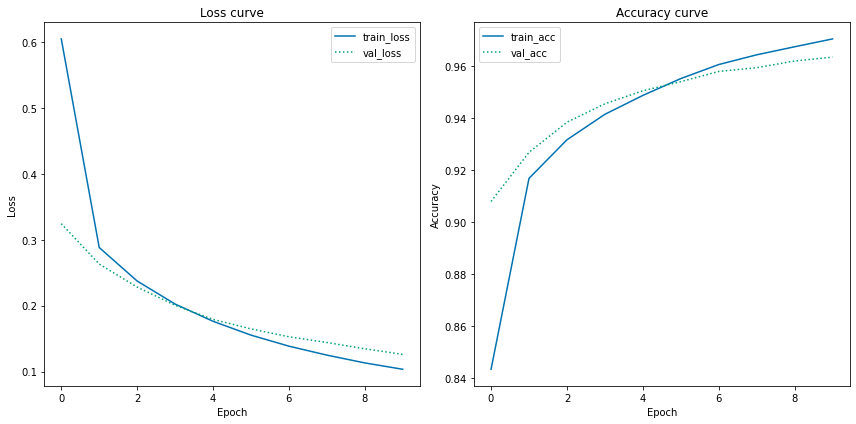

In [ ]:
plt.style.use("seaborn-colorblind")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.tight_layout()
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Accuracy curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

### Classification report

In [19]:
# evaluate network
predictions = model.predict(X_test, batch_size=32)
# print classification report
print(predictions[0])

[1.5330079e-08 1.0046503e-08 6.5945802e-05 8.5841719e-04 1.9714561e-09
 3.6590793e-06 6.8667599e-11 2.2586919e-08 9.9907076e-01 1.1461011e-06]


In [20]:
# print classification report
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.97      0.98      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.96      0.95      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.95      0.97      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



## Inspect using ```tensorboard```

To do this, we'll need to go the command line...